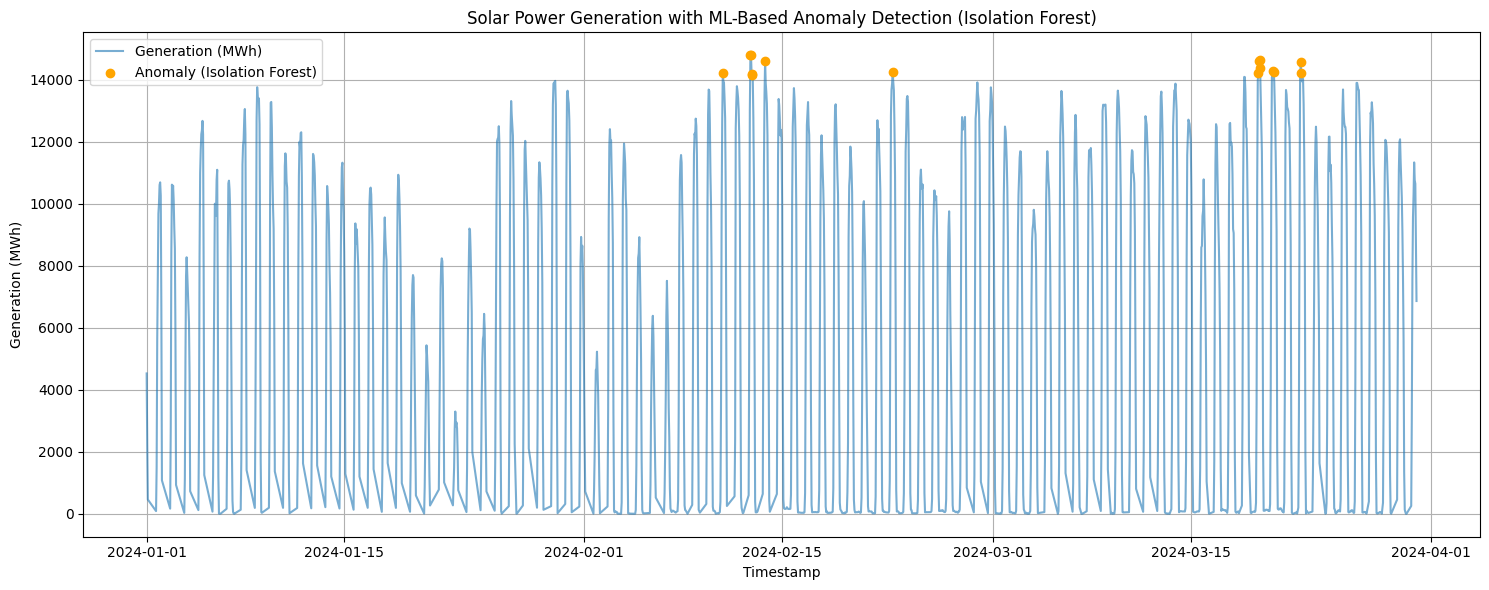

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load cleaned dataset
df = pd.read_csv('../data/processed/solar_california_cleaned.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Prepare data for Isolation Forest
X = df[['generation']].values

# Fit Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df['anomaly_iforest'] = model.fit_predict(X)

# Convert to boolean flag: -1 = anomaly, 1 = normal
df['anomaly_iforest'] = df['anomaly_iforest'] == -1

# Save results
df.to_csv('../data/processed/solar_anomalies_isolation_forest.csv', index=False)

# Plot results
plt.figure(figsize=(15, 6))
plt.plot(df['timestamp'], df['generation'], label='Generation (MWh)', alpha=0.6)
plt.scatter(df[df['anomaly_iforest']]['timestamp'],
            df[df['anomaly_iforest']]['generation'],
            color='orange', label='Anomaly (Isolation Forest)', zorder=5)
plt.title('Solar Power Generation with ML-Based Anomaly Detection (Isolation Forest)')
plt.xlabel('Timestamp')
plt.ylabel('Generation (MWh)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig('../output/solar_anomalies_isolation_forest.png')
plt.show()